In [10]:
import pandas as pd
import numpy as np

import os, sys
import collections
from collections import defaultdict
from collections import Counter

import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,20)

Objectives:

* ~Data papers wrt to timestamp yearwise~
* ~Data papers statistics wrt to multilingual, Language specific stat Note: “[paper_title]” means lang != eng~
* ~Topic specific papers statistics~
* ~Intersections statistics~
* ~Topics specific clustering tsne~


In [2]:
os.listdir('./../papers/key_meta/')

['tdm1_metadf.csv',
 'Breast Cancer_metadf.csv',
 'trastuzumab_metadf.csv',
 'progression free survival_metadf.csv',
 'pertuzumab_metadf.csv',
 'neratinib_metadf.csv',
 'neoadjuvant_metadf.csv',
 'radiation_metadf.csv',
 'disease free survival_metadf.csv',
 'genome wide association study_metadf.csv',
 'polygenic risk score_metadf.csv',
 'adjuvant_metadf.csv',
 'surgery_metadf.csv',
 'chemotherapy_metadf.csv',
 'pathologic complete response_metadf.csv',
 'overall survival_metadf.csv',
 'hormone therapy_metadf.csv',
 'polymorphism_metadf.csv']

In [3]:
data_dir = './../papers/key_meta/'

In [4]:
def analysis(data_dir, filename, log=False):
    
    df = pd.read_csv(data_dir+filename)
    df = df[df['title'].notna()] # removed entries with no title info
    name = filename.split('.')[0].split('_')[0]
    
    n = len(set(df.pubmed_id.values))

    other_lang = 0
    for i,t in enumerate(df['title'].values):
        #print(type(t), i+2, t)
        if t[0] == '[' or t[-1] == ']':
            #print(t)
            other_lang += 1
    
    yeard, monthd = [],[]
    for i,t in enumerate(df['publication_date'].values):
        ts = t.split('-')
        yeard.append(int(ts[0]))
        try:
            # sometime only year information is available
            monthd.append(ts[1])
        except:
            continue
            #print(ts,t,i+2)
            #sys.exit(0)       
    
    yd, md = Counter(yeard),Counter(monthd)
    
    if log:
        print(f'Keyword: {name}')
        print(f'Number of papers: {n}\n')
        print(f'Other lang articles: {other_lang}') 
        print(f'Yearwise distribution: {yd}')
        print(f'Monthwise distribution: {md}')
        print('*'*50)

    return yd, md, {name:[n,other_lang]},  set(df['pubmed_id'].values)



In [5]:
 yd, md, nd , _ = analysis('./../papers/key_meta/', 'polymorphism_metadf.csv' , log=True)

Keyword: polymorphism
Number of papers: 978

Other lang articles: 24
Yearwise distribution: Counter({2021: 978})
Monthwise distribution: Counter({'04': 562, '03': 416})
**************************************************


In [6]:
named = {}
all_years = set()
all_year_record = dict()
all_ids = dict()
for name in os.listdir(data_dir):
    yd, md, nd, _  = analysis('./../papers/key_meta/', name )
    named = {**named, **nd}
    all_years |= set(yd.keys())
    all_year_record[list(nd.keys())[0]] = dict(yd)#collections.OrderedDict(sorted(yd.items(),reverse=True))#dict(yd)
    all_ids[list(nd.keys())[0]] = _

In [7]:
for k,v in all_year_record.items():
    for y in all_years:
        if y not in v:
            all_year_record[k][y] = 0
for k,v in all_year_record.items():
    all_year_record[k] = collections.OrderedDict(sorted(v.items(),reverse=True))
#all_year_record

<AxesSubplot:>

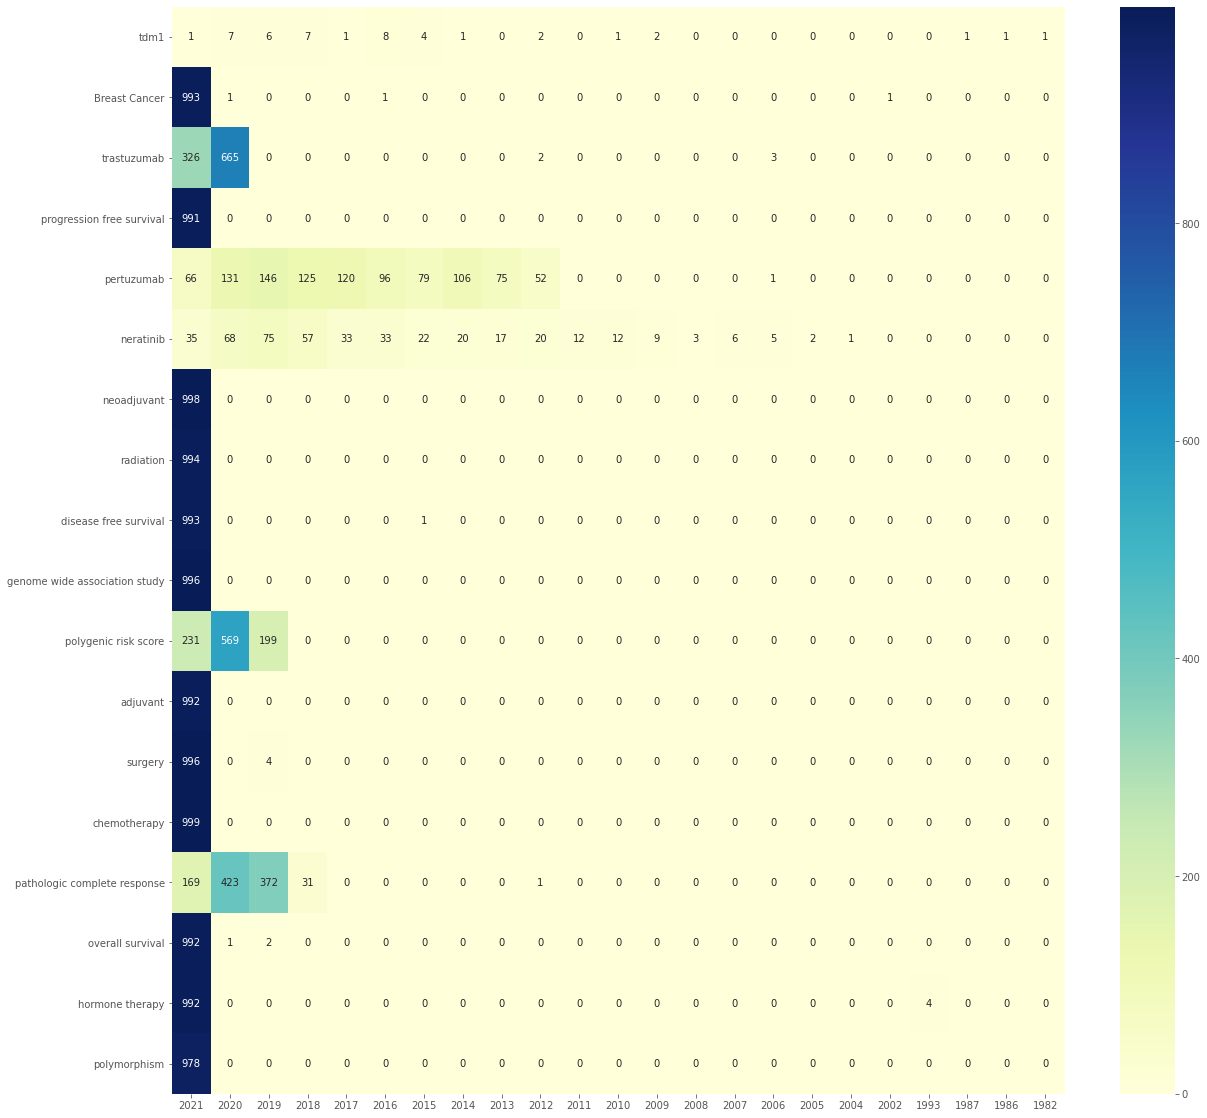

In [11]:
publication_list = []
for k,v in all_year_record.items():
    publication_list.append(list(v.values()))
plm = np.asarray(publication_list)

df_pl = pd.DataFrame(plm, index = list(all_ids.keys()),
                  columns = list(all_year_record['polymorphism'].keys()), dtype=int)
plt.figure(figsize = (20,20))

sn.heatmap(df_pl,  annot=True, fmt='d', cmap="YlGnBu")

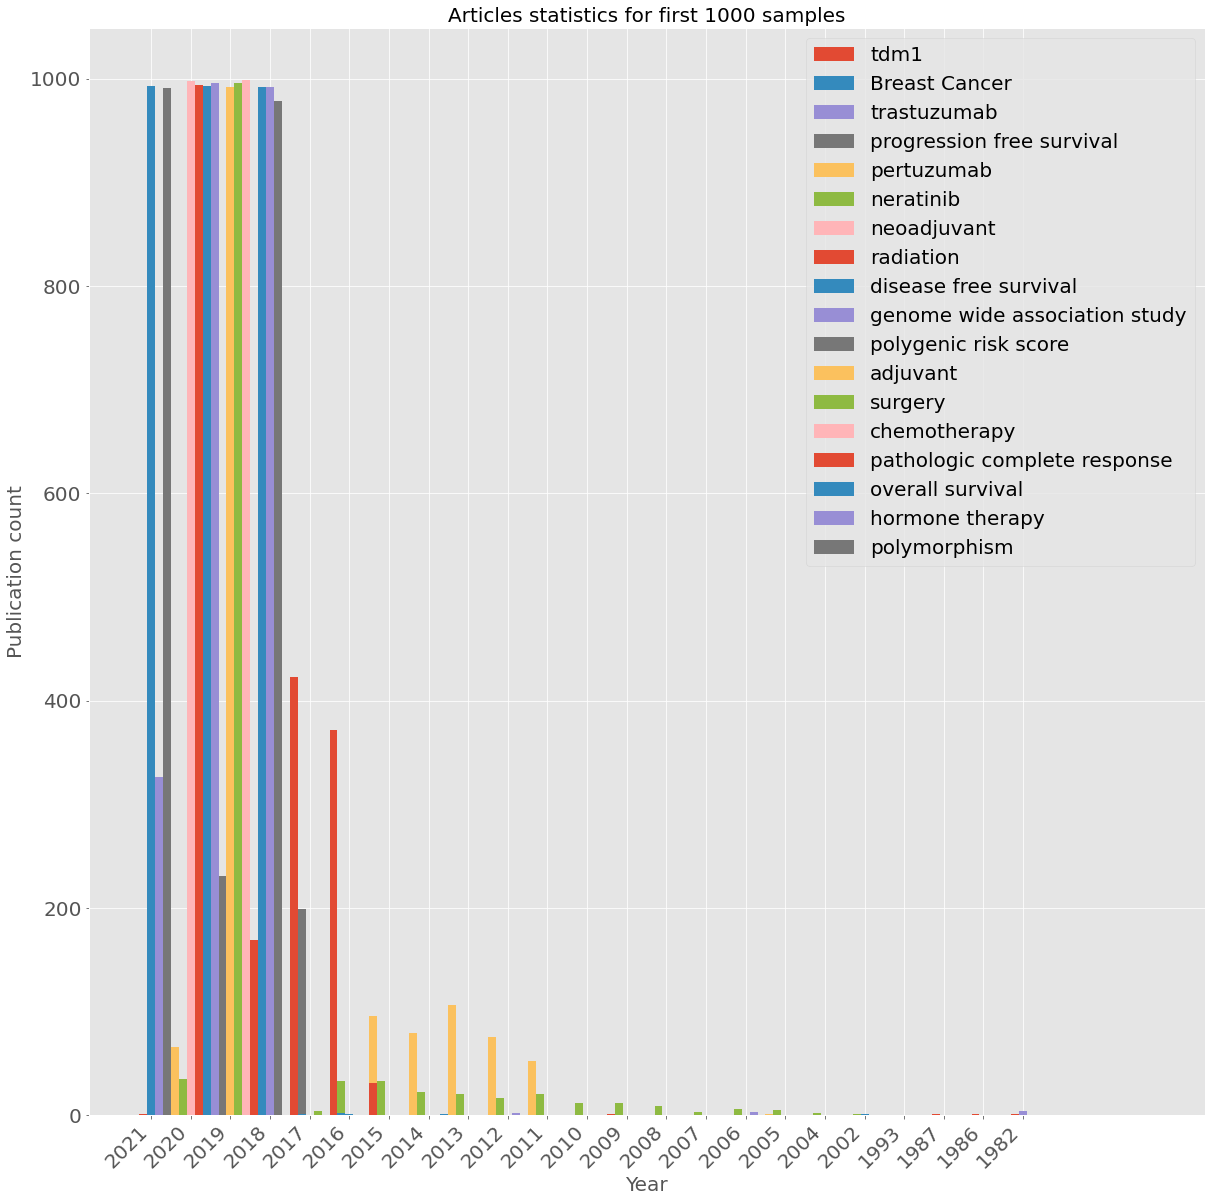

In [12]:
#years-keyword publications analysis
kd,k = list(all_year_record.values()), list(all_year_record.keys())

N = len(all_year_record['tdm1'].keys())

ind = np.arange(N) 
width = 0.2

for i,kk in enumerate(k):
    plt.bar(ind + width*i, list(kd[i].values()), width,label=k[i])
    
    #if i ==5: break
    
#plt.bar(ind, list(all_year_record['surgery'].values()), width, label='surgery')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Publication count', fontsize = 20)
plt.title('Articles statistics for first 1000 samples', fontsize= 20)
plt.yticks(fontsize=20)
plt.xticks(ind + width*len(k) / len(k), (list(all_year_record['tdm1'].keys())), fontsize = 20)
plt.legend(loc='best', prop={'size': 20})
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


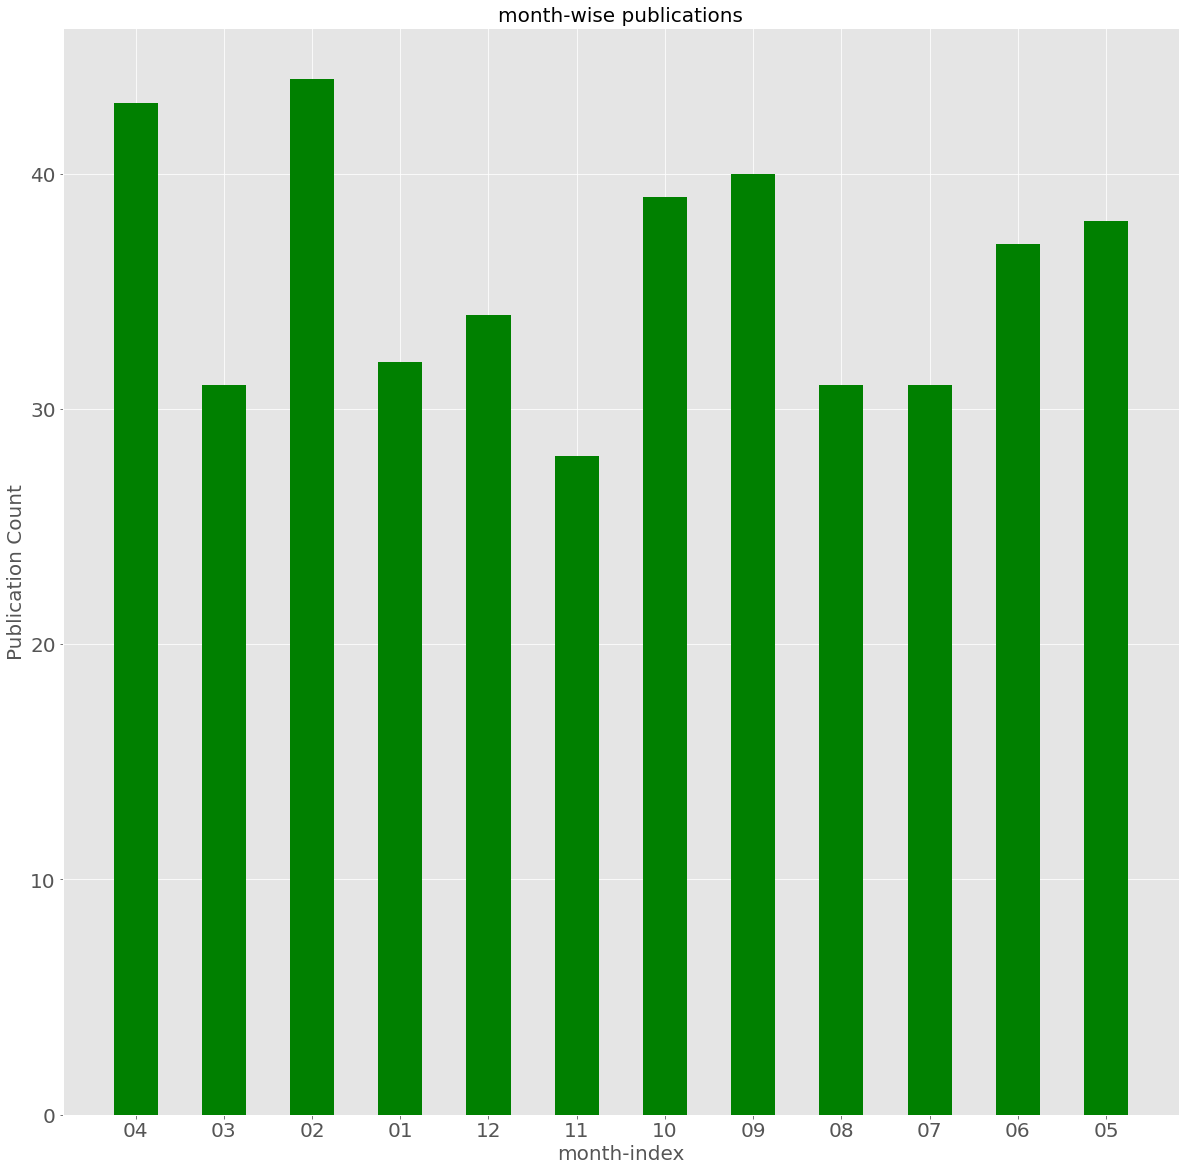

In [14]:
#year or month publications analysis - individual keyword
#
# keys = ['pertuzumab', 'neoadjuvant', 'disease free survival', 'chemotherapy', 'hormone therapy', 'adjuvant', 
# 'surgery', 'polymorphism', 'radiation', 'Breast Cancer', 'tdm1', 'neratinib', 'genome wide association study',
# 'progression free survival', 'polygenic risk score', 'pathologic complete response', 'trastuzumab', 
# 'overall survival']

yd, md, nd, _ = analysis('./../papers/key_meta/', 'neratinib_metadf.csv' )

atype = 'month'
ad = yd if atype == 'year' else md
x = ad.keys()#['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = ad.values()#[5, 6, 15, 22, 24, 8]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green', width=0.5)
plt.xlabel(f"{atype}-index", fontsize=20)
plt.ylabel("Publication Count", fontsize=20)
plt.title(f"{atype}-wise publications", fontsize=20)

plt.xticks(x_pos, x,fontsize=20 )
plt.yticks(fontsize=20)
plt.show()

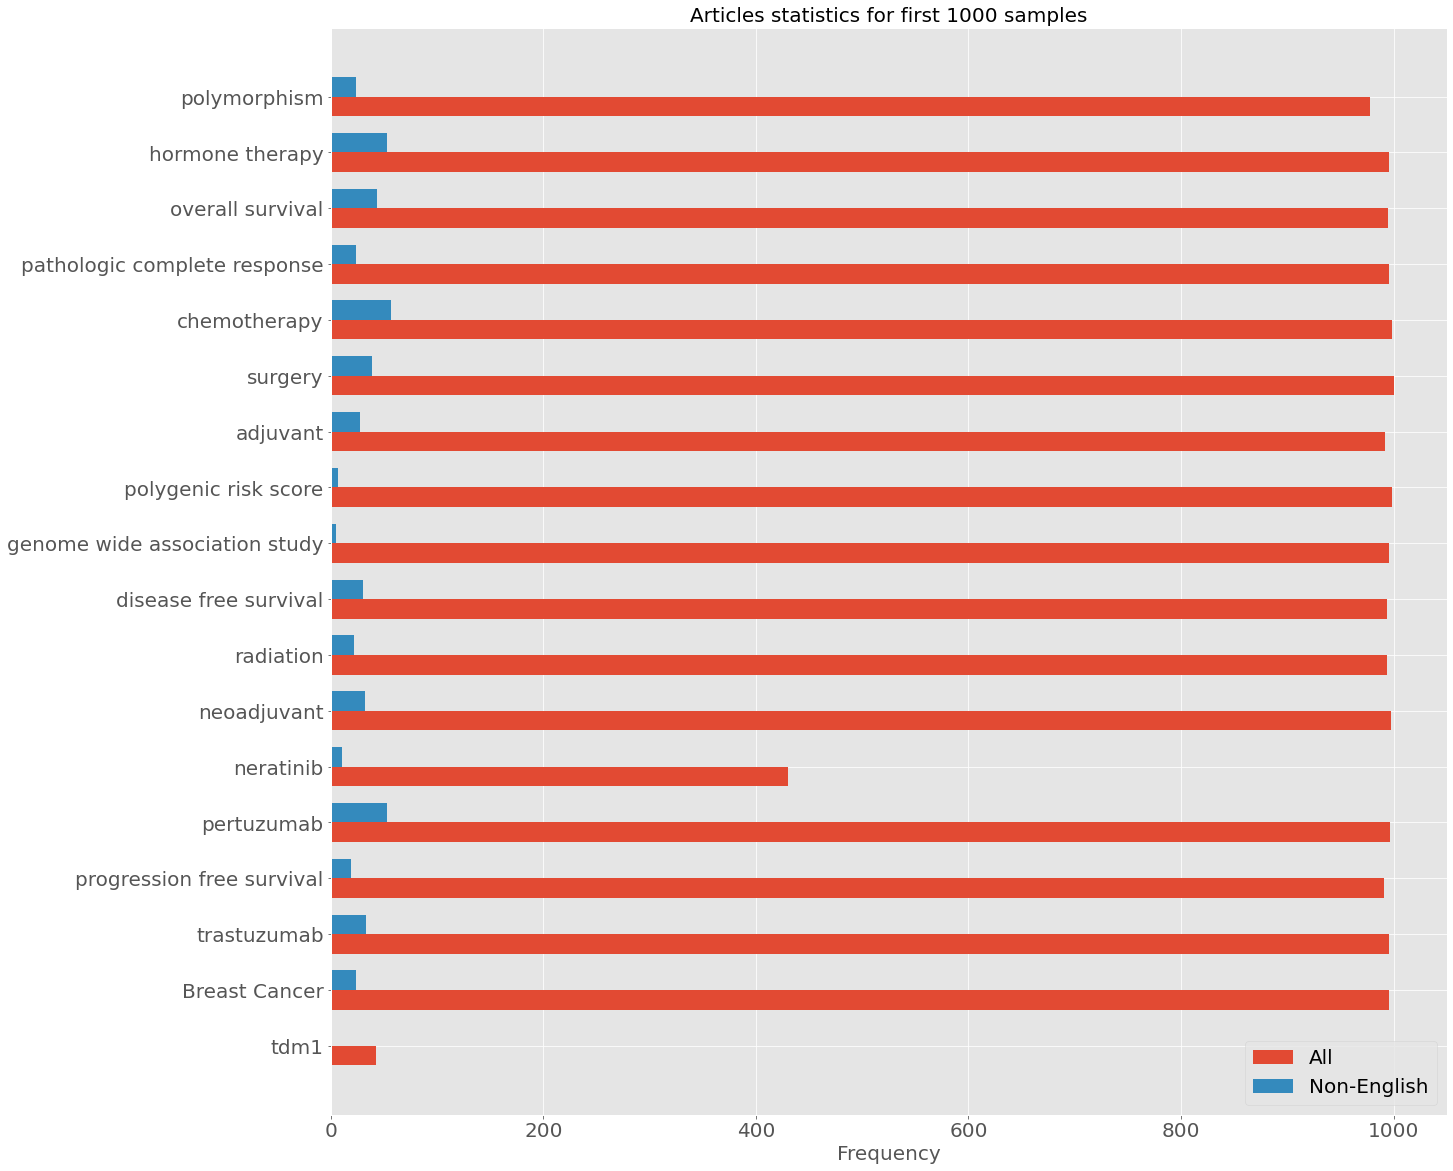

In [15]:
# Multilinguality + Keyword-articles analysis
# Requires: named dictionary 
N = len(named)
al = np.array(list(named.values()))
article_count = (al[:,0])
lang_count = (al[:,1])

ind = np.arange(N) 
width = 0.35       
plt.barh(ind, article_count, width, label='All')
plt.barh(ind + width, lang_count, width,label='Non-English')

plt.xlabel('Frequency', fontsize = 20)
plt.title('Articles statistics for first 1000 samples', fontsize= 20)
plt.xticks(fontsize=20)
plt.yticks(ind + width / 2, (list(named.keys())), fontsize = 20)
plt.legend(loc='best', prop={'size': 20})
plt.show()

<AxesSubplot:>

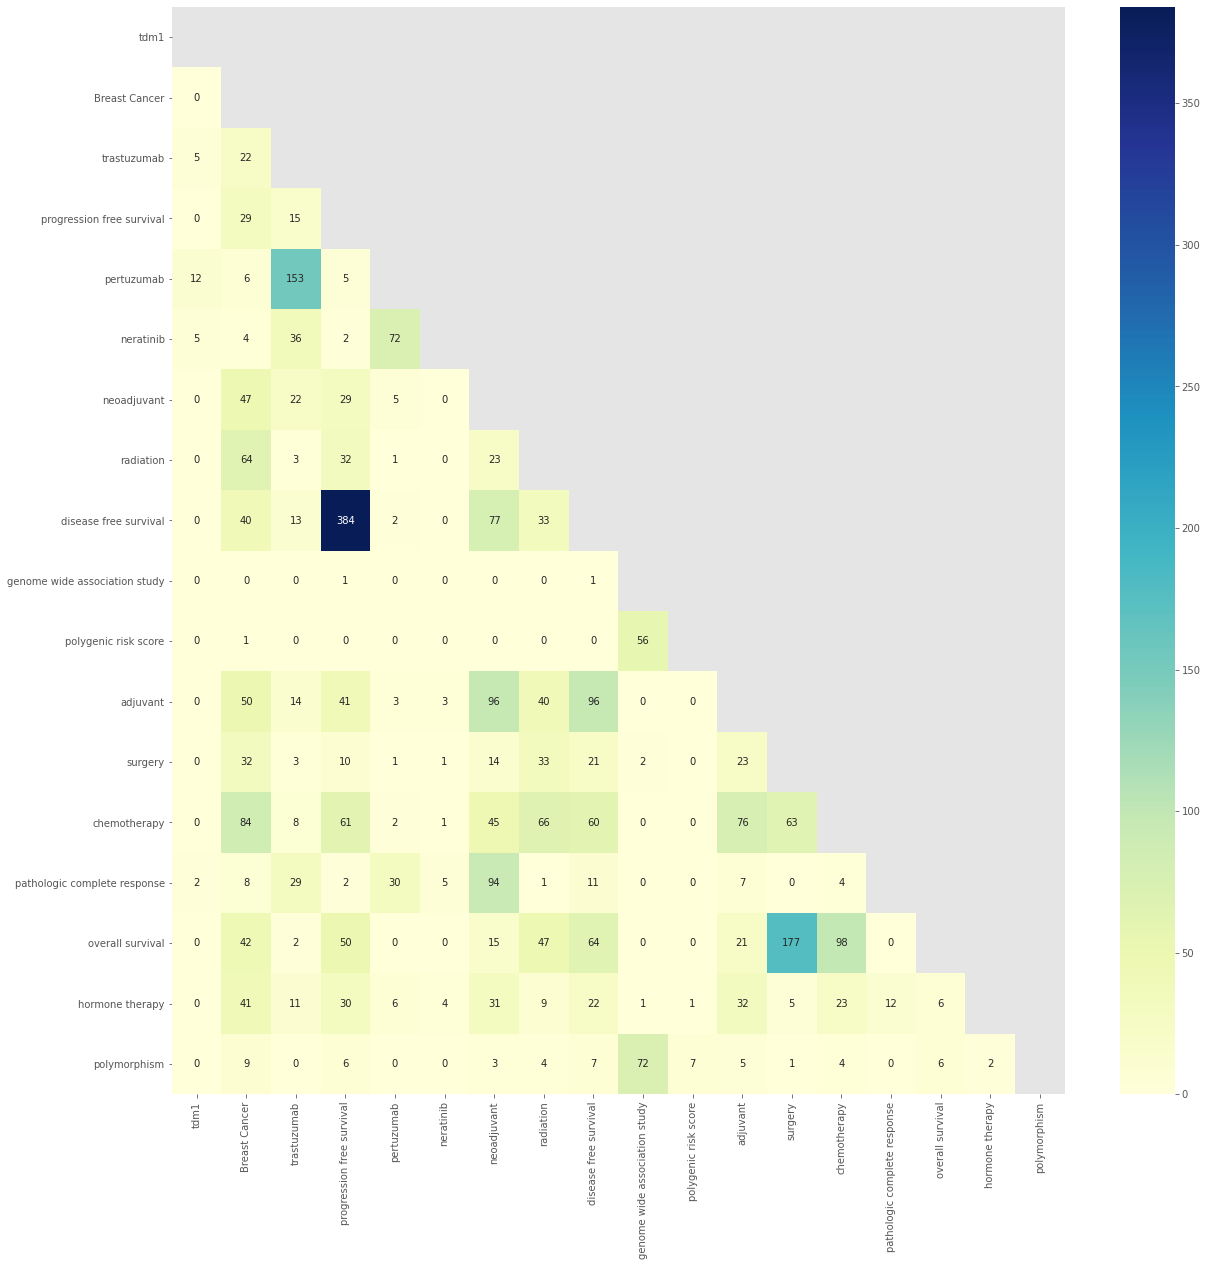

In [16]:
# intersections between keyword publications
import seaborn as sn
cm = np.zeros((len(all_ids), len(all_ids)))

for i,ik in enumerate(all_ids.keys()):
    for j,jk in enumerate(all_ids.keys()):
        if i != j :
            cm[i][j] = int(len(all_ids[ik] & all_ids[jk]))

df_cm = pd.DataFrame(cm, index = list(all_ids.keys()),
                  columns = list(all_ids.keys()), dtype=int)
plt.figure(figsize = (20,20))

mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(df_cm,  mask=mask,annot=True, fmt='d', cmap="YlGnBu")

# TSNE Visualization

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import time
import torch

from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer, util

torch.Size([43, 768]) torch.Size([1, 768])
torch.Size([996, 768]) torch.Size([1, 768])
torch.Size([996, 768]) torch.Size([1, 768])
torch.Size([991, 768]) torch.Size([1, 768])
torch.Size([997, 768]) torch.Size([1, 768])
torch.Size([430, 768]) torch.Size([1, 768])
torch.Size([998, 768]) torch.Size([1, 768])
torch.Size([994, 768]) torch.Size([1, 768])
torch.Size([994, 768]) torch.Size([1, 768])
torch.Size([996, 768]) torch.Size([1, 768])
torch.Size([999, 768]) torch.Size([1, 768])
torch.Size([992, 768]) torch.Size([1, 768])
torch.Size([1000, 768]) torch.Size([1, 768])
torch.Size([999, 768]) torch.Size([1, 768])
torch.Size([996, 768]) torch.Size([1, 768])
torch.Size([995, 768]) torch.Size([1, 768])
torch.Size([996, 768]) torch.Size([1, 768])
torch.Size([978, 768]) torch.Size([1, 768])


In [17]:
#filename = 'tdm1_metadf.csv'
df_final = pd.DataFrame()
for filename in os.listdir(data_dir):
    df = pd.read_csv(data_dir+filename)
    df = df[df['title'].notna()] # removed entries with no title info
    df['label'] = filename.split('_')[0]
    df_final = df_final.append(df)
df_final

pubmed_id                                              title  \
0     33479246  Fibroblast growth factor receptor facilitates ...   
1     33259892  Third-line treatment of HER2-positive advanced...   
2     33238772  Margetuximab for the treatment of HER2-positiv...   
3     32737515  Post-neoadjuvant treatment with capecitabine a...   
4     32236828  Comparison of outcomes in a population-based c...   
..         ...                                                ...   
995   33709967  Sequence Variations of Epstein-Barr Virus-Enco...   
996   33709963  Pattern of genomic variation in SARS-CoV-2 (CO...   
997   33709789                                   Polymorphism of    
998   33709636  A novel machine learning approach (svmSomatic)...   
999   33709519  Effect of rs67085638 in long non-coding RNA (C...   

    publication_date         label  
0         2021-01-23          tdm1  
1         2020-12-02          tdm1  
2         2020-11-27          tdm1  
3         2020-08-02          tdm1  
4         2020-04-03          tdm1  
..               ...           ...  
995       2021-03-13  polymorphism  
996       2021-03-13  polymorphism  
997       2021-03-13  polymorphism  
998       2021-03-13  polymorphism  
999       2021-03-13  polymorphism  

[16390 rows x 4 columns]

In [18]:
# tsne plotting of title
model = SentenceTransformer('allenai-specter')

paper_texts = [paper for paper in df_final['title']]

#Compute embeddings for all papers
corpus_embeddings = model.encode(paper_texts, convert_to_tensor=True)

In [276]:
corpus_embeddings.shape

torch.Size([16390, 768])

In [277]:
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)

pca2_result = pca2.fit_transform(corpus_embeddings.numpy())
pca3_result = pca3.fit_transform(corpus_embeddings.numpy())

print('Explained variation per principal component2: {}'.format(pca2.explained_variance_ratio_))
print('Explained variation per principal component3: {}'.format(pca3.explained_variance_ratio_))

Explained variation per principal component2: [0.14608704 0.06751484]
Explained variation per principal component3: [0.14608708 0.06751484 0.05091251]


In [281]:
df2d = pd.DataFrame(data=pca2_result, columns=["x", "y"])
df3d = pd.DataFrame(data=pca3_result, columns=["x", "y", "z"])

df2d['label'] = df_final['label'].values
df3d['label'] = df_final['label'].values

<AxesSubplot:xlabel='x', ylabel='y'>

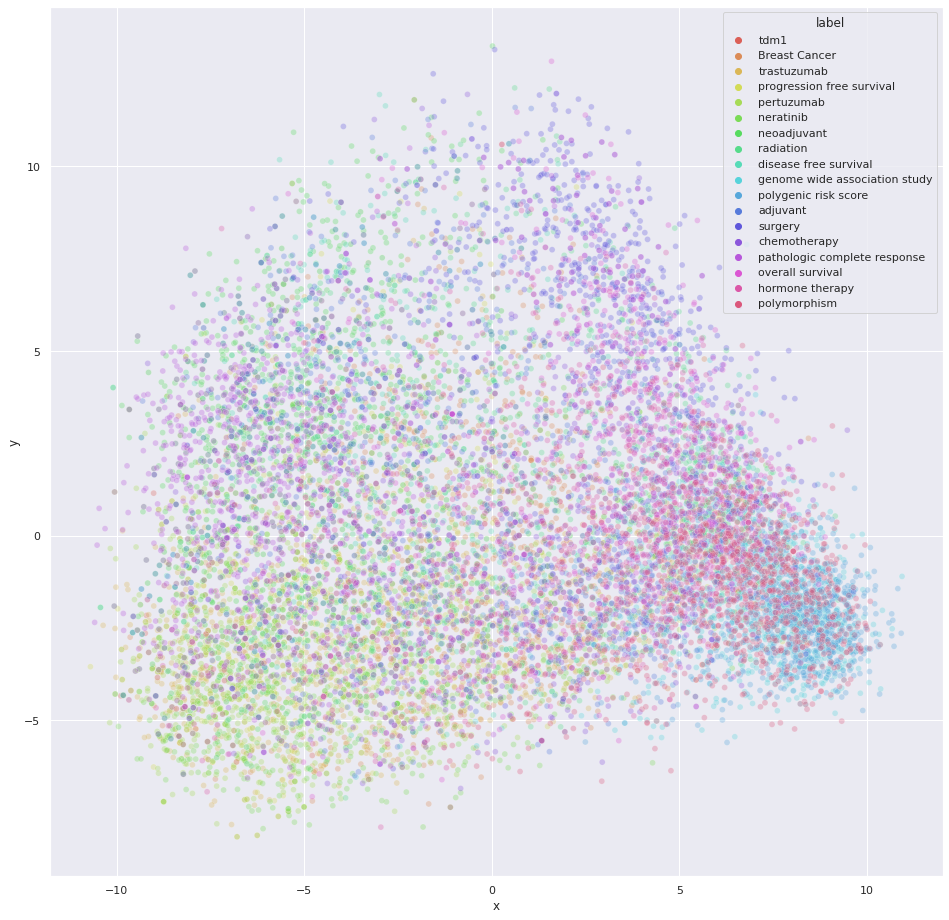

In [432]:
#pca  2D - seaborn
plt.figure(figsize=(16,16))
sn.scatterplot(
    x="x", y="y",
    hue="label",
    palette=sn.color_palette("hls", 18),
    data=df3d,
    legend="full",
    alpha=0.3
)

Text(0.5, 0, 'z')

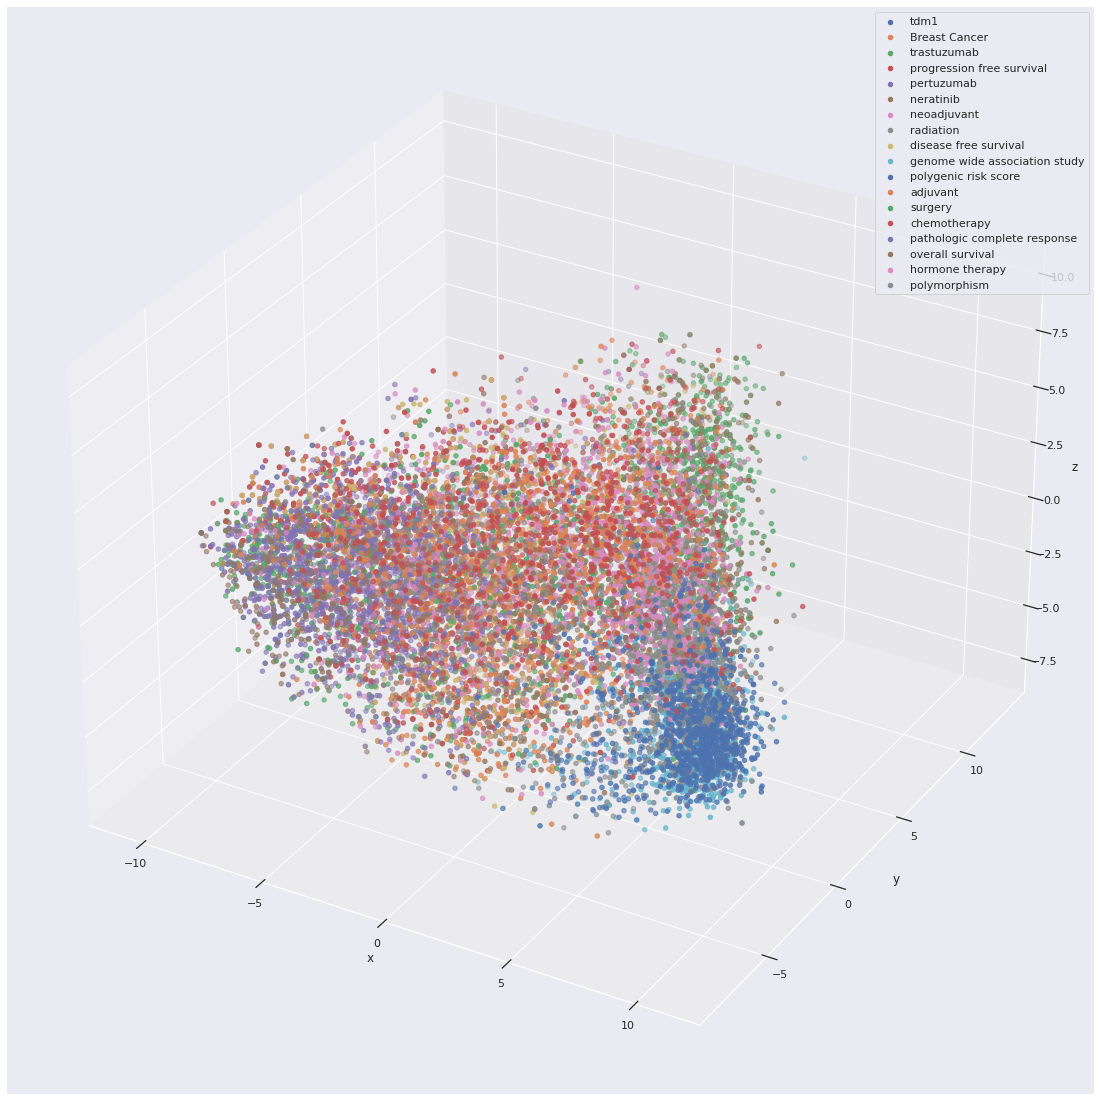

In [436]:
#pca
c = 0
ax = plt.axes(projection='3d')
    
for i, v in all_ids.items():
    s = ax.scatter(xs=pca3_result[c:c+len(v),0], 
    ys=pca3_result[c:c+len(v),1], 
    zs=pca3_result[c:c+len(v),2], marker='o',
     label=i)
    c+=len(v)

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [334]:
labeldict={l:i for i,l in enumerate(set(df_final['label'].values))}
ll =  [labeldict[l] for l in df_final['label'].values]
labeldict

{'pertuzumab': 0,
 'neoadjuvant': 1,
 'disease free survival': 2,
 'chemotherapy': 3,
 'hormone therapy': 4,
 'adjuvant': 5,
 'surgery': 6,
 'polymorphism': 7,
 'radiation': 8,
 'Breast Cancer': 9,
 'tdm1': 10,
 'neratinib': 11,
 'genome wide association study': 12,
 'progression free survival': 13,
 'polygenic risk score': 14,
 'pathologic complete response': 15,
 'trastuzumab': 16,
 'overall survival': 17}

In [300]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(corpus_embeddings.numpy())
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 16390 samples in 0.014s...
[t-SNE] Computed neighbors for 16390 samples in 9.451s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16390
[t-SNE] Computed conditional probabilities for sample 2000 / 16390
[t-SNE] Computed conditional probabilities for sample 3000 / 16390
[t-SNE] Computed conditional probabilities for sample 4000 / 16390
[t-SNE] Computed conditional probabilities for sample 5000 / 16390
[t-SNE] Computed conditional probabilities for sample 6000 / 16390
[t-SNE] Computed conditional probabilities for sample 7000 / 16390
[t-SNE] Computed conditional probabilities for sample 8000 / 16390
[t-SNE] Computed conditional probabilities for sample 9000 / 16390
[t-SNE] Computed conditional probabilities for sample 10000 / 16390
[t-SNE] Computed conditional probabilities for sample 11000 / 16390
[t-SNE] Computed conditional probabilities for sample 12000 / 16390
[t-SNE] Computed conditional probabilities for sa

In [302]:
df3dt = pd.DataFrame(data=tsne_results, columns=["x", "y", "z"])
df3dt['label'] = df_final['label'].values

<AxesSubplot:xlabel='x', ylabel='y'>

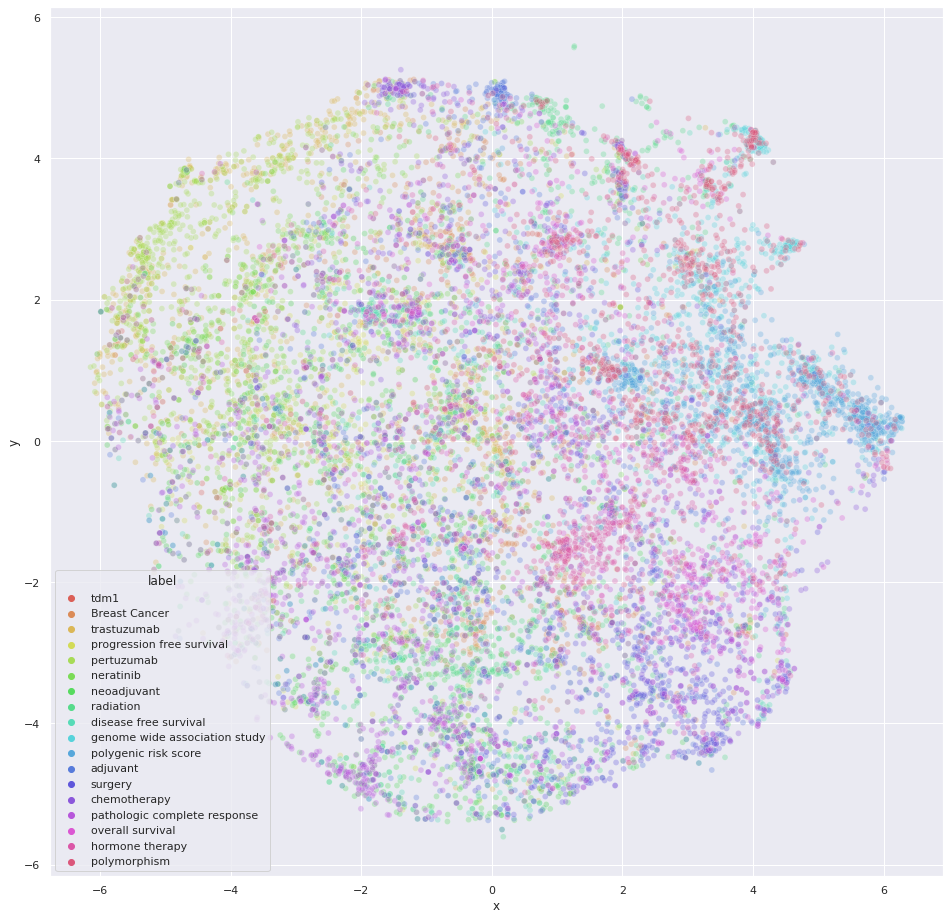

In [426]:
#tsne 2D - seaborn
plt.figure(figsize=(16,16))
sn.scatterplot(
    x="x", y="y",
    hue="label",
    palette=sn.color_palette("hls", 18),
    data=df3dt,
    legend="full",
    alpha=0.3
)

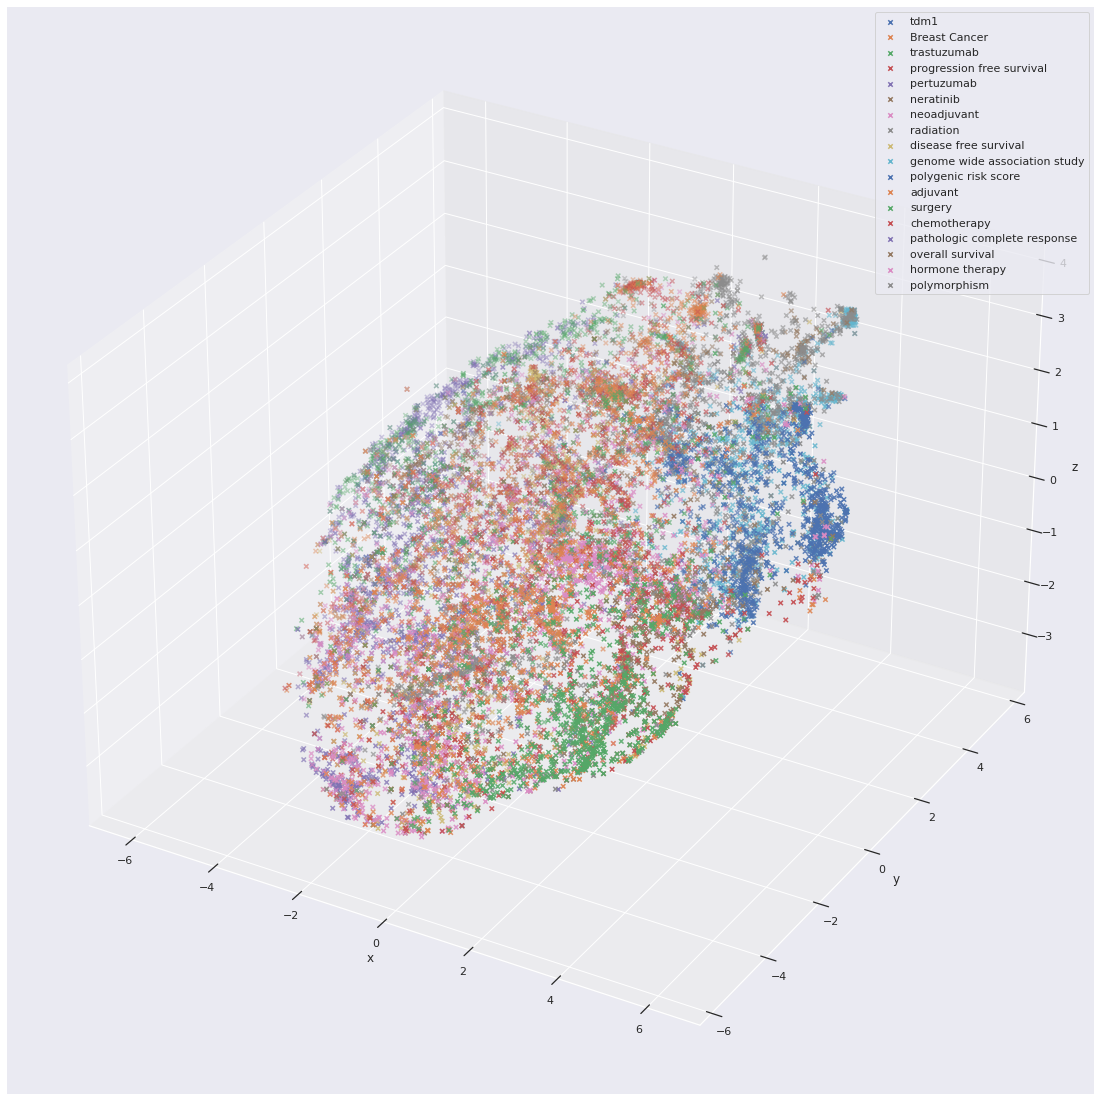

In [429]:
#tsne
c = 0
ax = plt.axes(projection='3d')
    
for i, v in all_ids.items():
    s = ax.scatter(xs=tsne_results[c:c+len(v),0], 
    ys=tsne_results[c:c+len(v),1], 
    zs=tsne_results[c:c+len(v),2], marker='x',cmap='nipy_spectral',
     label=i)
    c+=len(v)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()


In [430]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

colors = sn.color_palette("hls", 18)
cl = [colors[l] for l in ll]

patches = []
for idx, ((i,v),c) in enumerate(zip(all_ids.items(), colors)):
    #print(idx, i)
    patch = mpatches.Patch(color=c, label=i)
    patches.append(patch)
    
patches

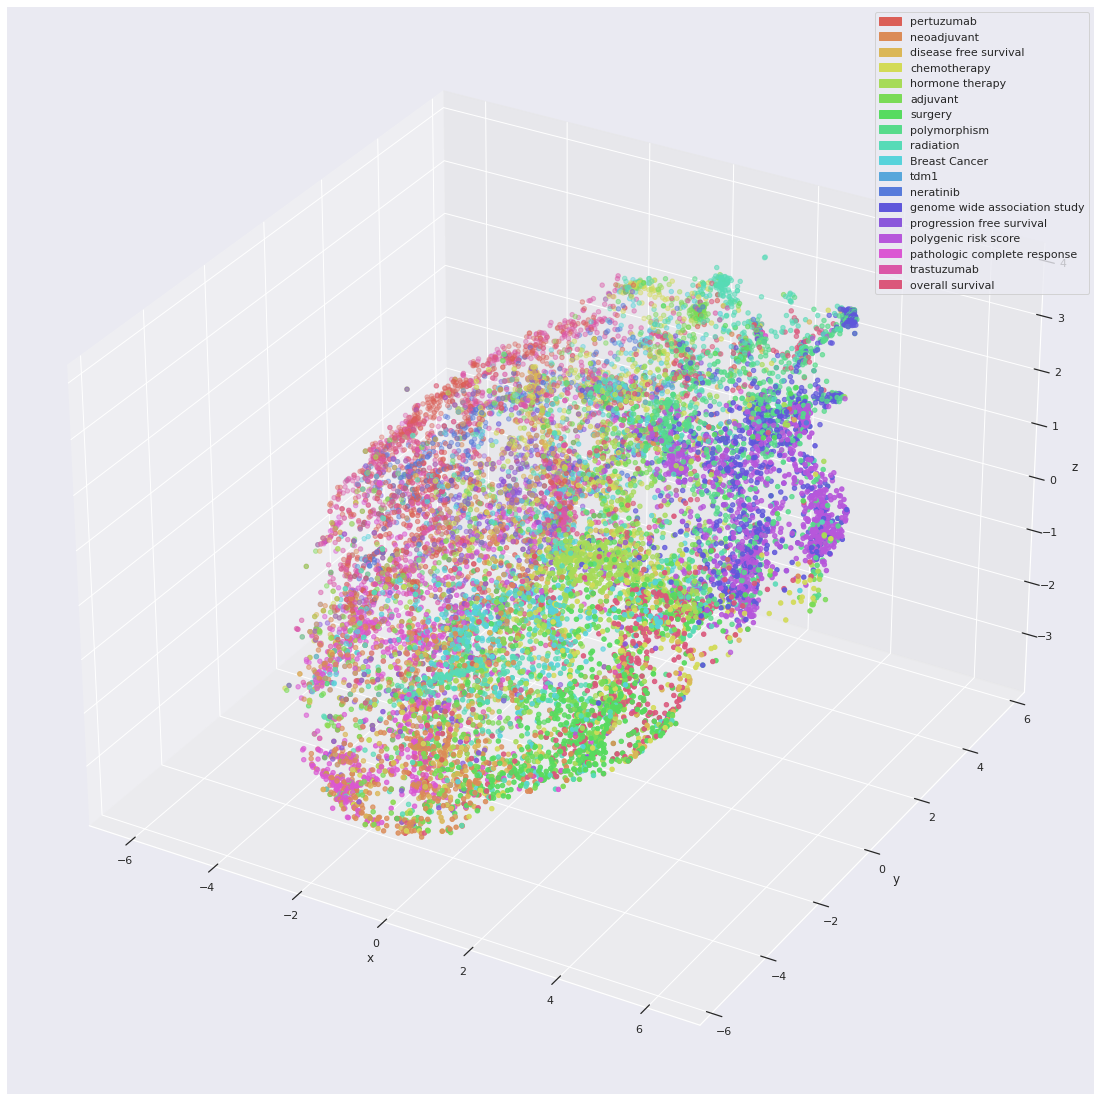

In [421]:
#tsne

sn.set(style = "darkgrid")
#ax = plt.axes
fig = plt.figure()
ax = fig.add_subplot(111 , projection = '3d')

x = df3dt['x']
y = df3dt['y']
z = df3dt['z']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ss = ax.scatter(x, y,z, c=cl)
plt.legend(handles = patches,labels=labeldict.keys())
plt.show()

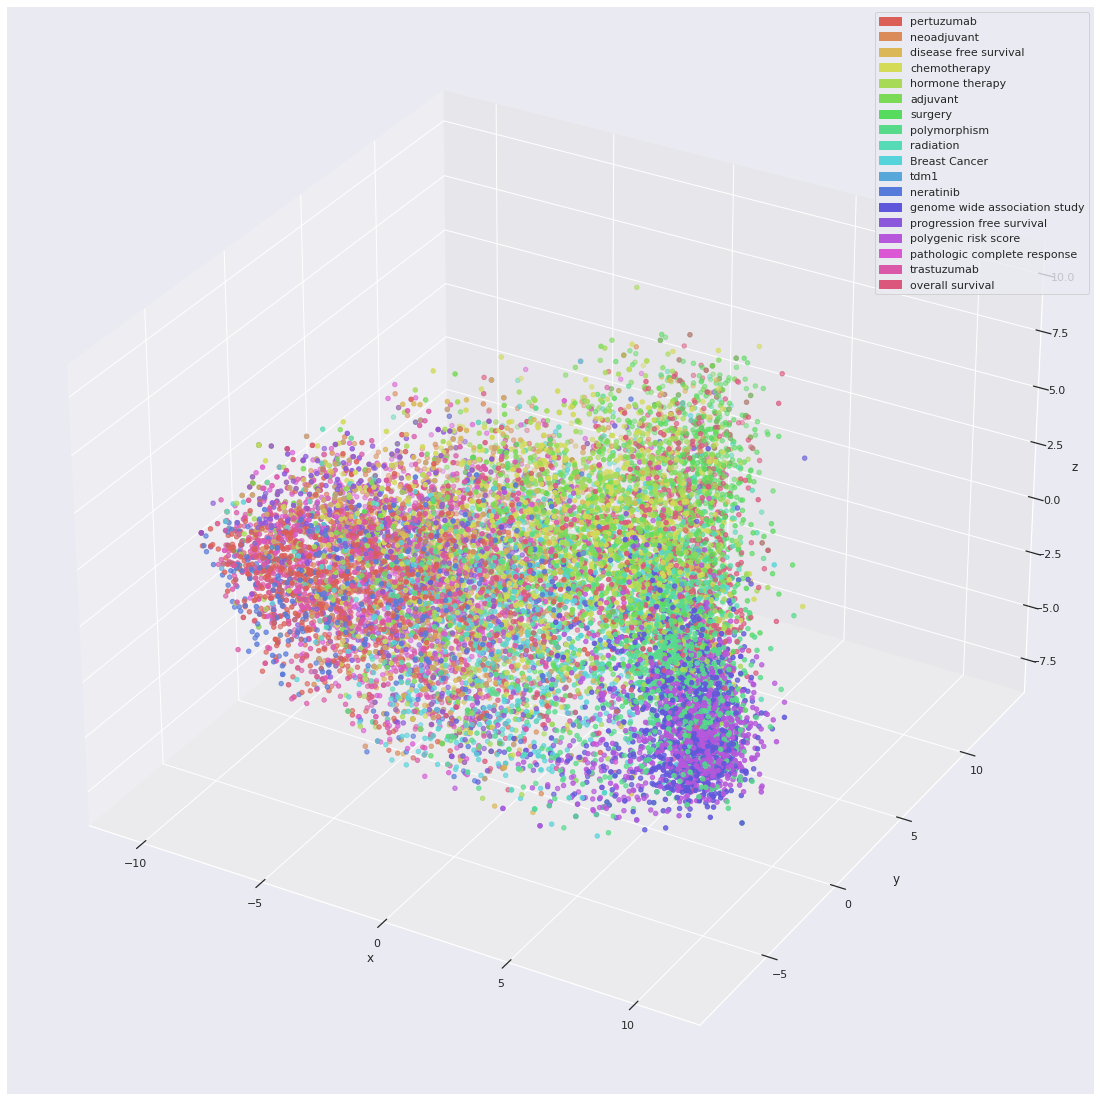

In [425]:
#pca -3D
sn.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df3d['x']
y = df3d['y']
z = df3d['z']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z, c=cl)
plt.legend(handles=patches, labels=labeldict.keys())
plt.show()

# Centroid visualizaton 

torch.Size([18, 1, 768])
torch.Size([18, 768])
Explained variation per principal component3: [0.5758512  0.17838368 0.07295382]


Text(0.5, 0, 'z')

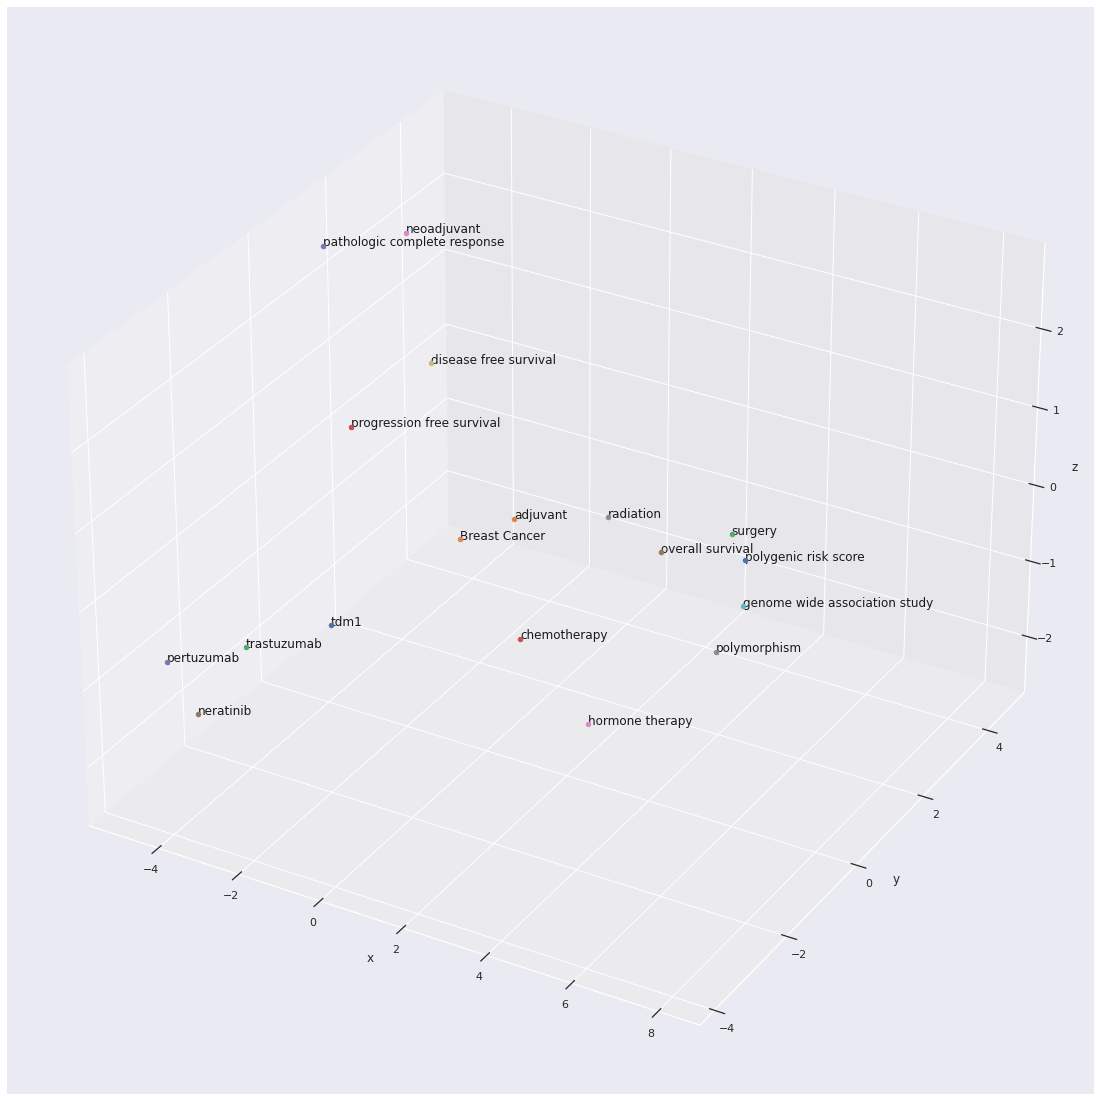

In [486]:
#centroid visualizaton - pca
centroid = []
for filename in os.listdir(data_dir):
    df = pd.read_csv(data_dir+filename)
    df = df[df['title'].notna()] # removed entries with no title info
    df['label'] = filename.split('_')[0]
    #print(df)
    texts = [paper for paper in df['title']]
    keyword_embeddings = model.encode(texts, convert_to_tensor=True)
    keyword_summary = torch.mean(keyword_embeddings, 0).unsqueeze(0)
    print(keyword_embeddings.shape, keyword_summary.shape)
    centroid.append(keyword_summary.numpy())
    #if len(centroid) == 4: break

centroid = torch.Tensor(centroid)

print(centroid.shape)
centroid_embeddings = centroid.squeeze()
print(centroid_embeddings.shape)

pca_centroid3 = PCA(n_components=3)

pca_centroid_result = pca_centroid3.fit_transform(centroid_embeddings.numpy())
print('Explained variation per principal component3: {}'.format(pca_centroid3.explained_variance_ratio_))

df3dc = pd.DataFrame(data=pca_centroid_result, columns=["x", "y", "z"])
#df3dc['label'] = df_final['label'].values

#pca
c = 0
ax = plt.axes(projection='3d')
    
for i, k in enumerate(all_ids.keys()):
    s = ax.scatter(xs=pca_centroid_result[i,0], 
        ys=pca_centroid_result[i,1], 
        zs=pca_centroid_result[i,2], marker='o')
    ax.text(pca_centroid_result[i,0], 
        pca_centroid_result[i,1], 
        pca_centroid_result[i,2],  k, size=12, zorder=1,  
     color='k')
    #if i == 3: break


#ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Text(0.5, 0, 'z')

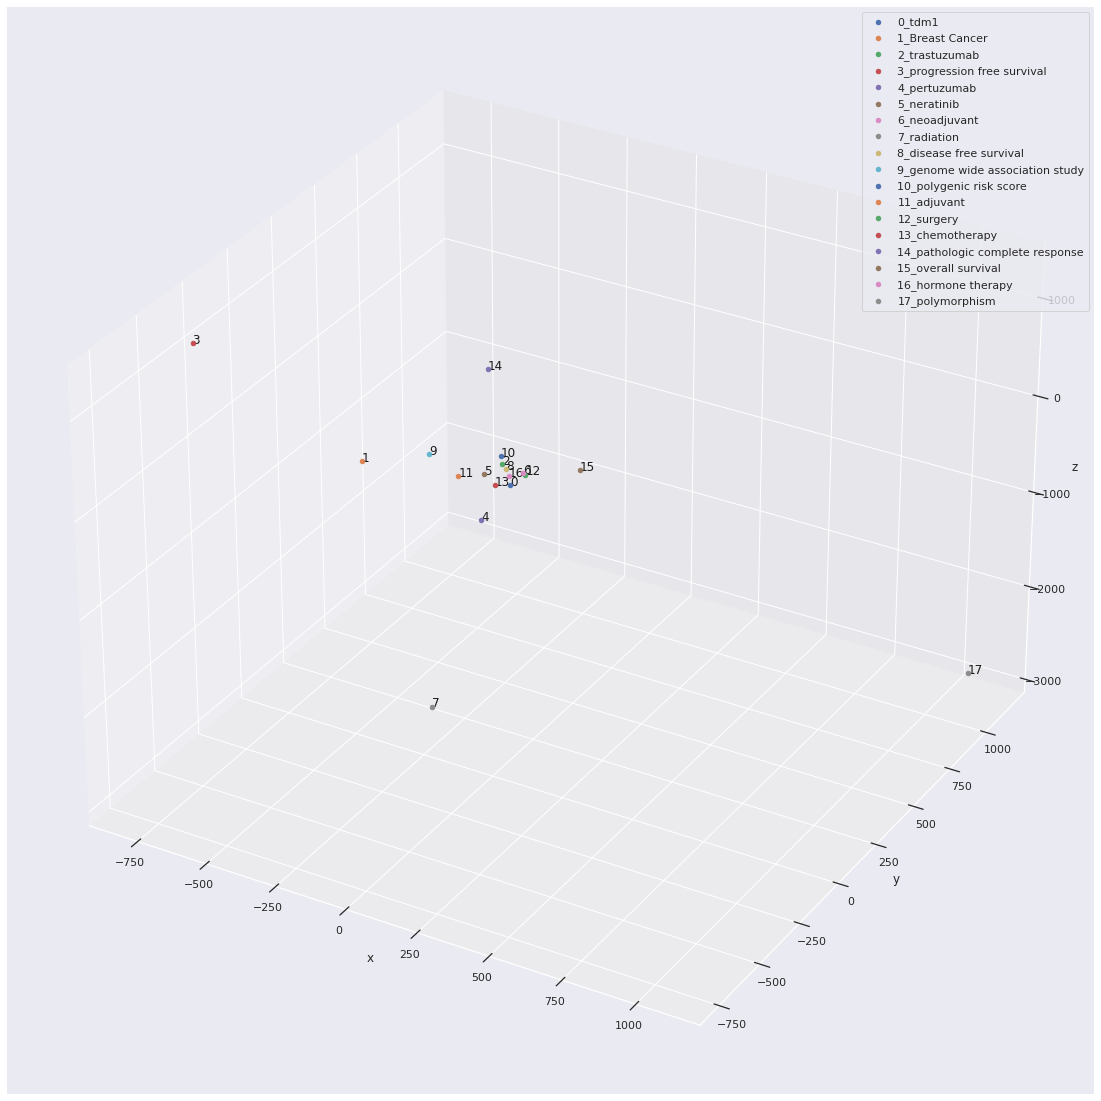

In [491]:
#centroid visualizaton - tsne
'''
centroid = []
for filename in os.listdir(data_dir):
    df = pd.read_csv(data_dir+filename)
    df = df[df['title'].notna()] # removed entries with no title info
    df['label'] = filename.split('_')[0]
    #print(df)
    texts = [paper for paper in df['title']]
    keyword_embeddings = model.encode(texts, convert_to_tensor=True)
    keyword_summary = torch.mean(keyword_embeddings, 0).unsqueeze(0)
    print(keyword_embeddings.shape, keyword_summary.shape)
    centroid.append(keyword_summary.numpy())
    #if len(centroid) == 4: break

centroid = torch.Tensor(centroid)

print(centroid.shape)
centroid_embeddings = centroid.squeeze()
print(centroid_embeddings.shape)

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_centroid_result = tsne.fit_transform(centroid_embeddings.numpy())

df3dc = pd.DataFrame(data=tsne_centroid_result, columns=["x", "y", "z"])
#df3dc['label'] = df_final['label'].values
'''
#pca
c = 0
ax = plt.axes(projection='3d')
    
for i, k in enumerate(all_ids.keys()):
    s = ax.scatter(xs=tsne_centroid_result[i,0], 
        ys=tsne_centroid_result[i,1], 
        zs=tsne_centroid_result[i,2], marker='o',label=f'{i}_{k}')
    ax.text(tsne_centroid_result[i,0], 
        tsne_centroid_result[i,1], 
        tsne_centroid_result[i,2],  f'{i}', size=12, zorder=1,  
     color='k')
    #if i == 3: break


ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


# References
* https://benalexkeen.com/bar-charts-in-matplotlib/
* https://seaborn.pydata.org/generated/seaborn.heatmap.html
* https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html
* https://www.sbert.net/docs/pretrained_models.html#scientific-publications
* https://colab.research.google.com/drive/12hfBveGHRsxhPIUMmJYrll2lFU4fOX06#scrollTo=lVftsxZXEgsH
* https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
* https://stackabuse.com/seaborn-scatter-plot-tutorial-and-examples/
* https://seaborn.pydata.org/generated/seaborn.color_palette.html
* https://stackoverflow.com/questions/43099279/matplotlib-scatter-valueerror-rgba-sequence-should-have-length-3-or-4
* https://matplotlib.org/stable/gallery/color/colormap_reference.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
* https://moonbooks.org/Articles/How-to-add-a-legend-for-a-scatter-plot-in-matplotlib-/

In [242]:
!pip install sentence-transformers

     |████████████████████████████████| 78 kB 1.9 MB/s eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.0-py3-none-any.whl size=119621 sha256=f1d7f4191a228467c5b42b7726618418284dc399c187adbefcca37b9ef4a2b14
  Stored in directory: /home/amansinha/.cache/pip/wheels/f8/78/10/c076a6c3bed946c9ffe7476bf5ac8c3e0edb76b93471ee3cdf
Successfully built sentence-transformers
You should consider upgrading via the '/home/amansinha/venv/global_env/bin/python3 -m pip install --upgrade pip' command.


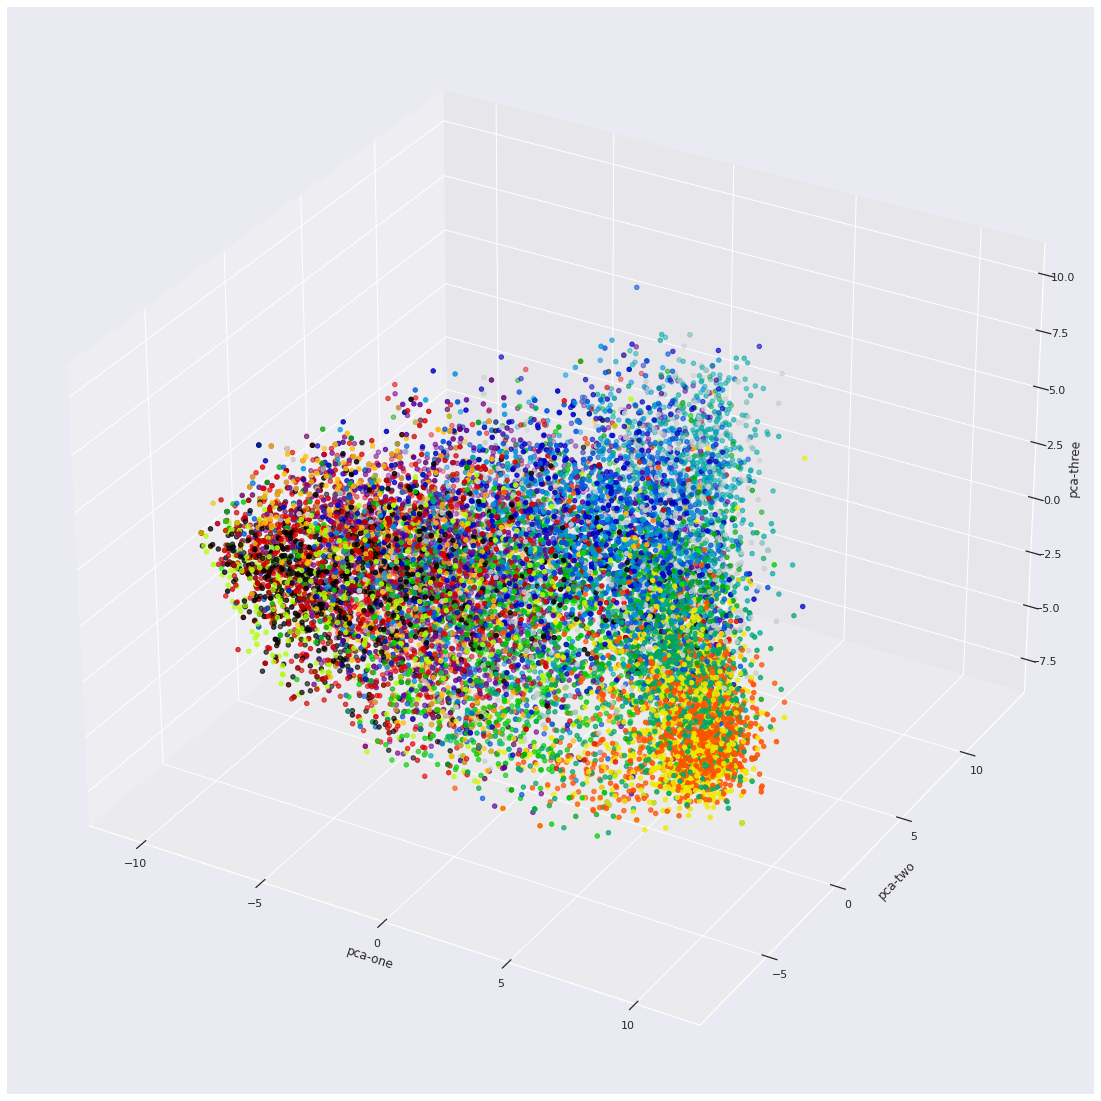

In [434]:
ax = plt.axes(projection='3d')
s = ax.scatter(
    xs=pca3_result[:,0], 
    ys=pca3_result[:,1], 
    zs=pca3_result[:,2], 
    c=ll, 
    cmap='nipy_spectral',
)

#plt.legend(handles=s.legend_elements()[0], labels=labeldict.keys())
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()